OEL 1
# Employee Attrition Analyzer

Analyze a dataset of employee records to predict whether an employee is likely to leave the
company.

Dataset: IBM HR Analytics Employee Attrition & Performance


o Clean and preprocess categorical and numerical data.

o Train and compare Logistic Regression, Decision Tree, and Random Forest
models.

o Evaluate results using confusion matrix, F1 score, and feature importance
visualization.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

Dataset Overview:
Shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

First few rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Trave

In [15]:
# Data Exploration and Cleaning
print("Basic Information:")
print(df.info())
print("\nMissing Values:") #Missing values kon kon si hain data set me wo Identify ker rhe hain
print(df.isnull().sum())
print("\nTarget Variable Distribution:") #check ker rhe hain ke target variable distribution kia ha
print(df['Attrition'].value_counts())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLe

In [16]:
# Data Preprocessing

constant_cols = ['EmployeeCount', 'StandardHours', 'Over18'] # un columns ko remove ker rhe hain jo prediction ke lie kam ke nhi
df_clean = df.drop(columns=constant_cols)

df_clean = df_clean.drop(columns=['EmployeeNumber'])
# catagorical data jo ha us ko nuerical me tabdeel kia ha like 0/1

df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})
X = df_clean.drop('Attrition', axis=1) # yaha features ko target variable se seperate kia ha
y = df_clean['Attrition']

# check ker rhe hain ke konsa feature categorical ha aur konsa feature numrical takke prprocessing ho sakke
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}")

Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [17]:
label_encoders = {}
X_encoded = X.copy()    #catagorical data ko numveric codesa me change kia ha

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

scaler = StandardScaler() #mean jis me 0 se 1 ke darmiyan
X_scaled = X_encoded.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print("Data after preprocessing:")
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")

Data after preprocessing:
Features shape: (1470, 30)
Target shape: (1470,)


In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Attrition rate in training: {y_train.mean():.3f}") #
print(f"Attrition rate in test: {y_test.mean():.3f}")

Training set size: (1176, 30)
Test set size: (294, 30)
Attrition rate in training: 0.162
Attrition rate in test: 0.160


In [19]:
# Model ki training ki ha jo jo required the question me like : Logistic regerssion , Decision Treee aur Random Forest
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.8776
F1 Score: 0.5000
Confusion Matrix:
[[240   7]
 [ 29  18]]

Training Decision Tree...
Decision Tree Results:
Accuracy: 0.7823
F1 Score: 0.3191
Confusion Matrix:
[[215  32]
 [ 32  15]]

Training Random Forest...
Random Forest Results:
Accuracy: 0.8367
F1 Score: 0.2000
Confusion Matrix:
[[240   7]
 [ 41   6]]


In [20]:
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORTS")
print("="*50)

for name in models.keys():
    print(f"\n{name}:")
    print(classification_report(y_test, results[name]['predictions']))


DETAILED CLASSIFICATION REPORTS

Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.72      0.38      0.50        47

    accuracy                           0.88       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.88      0.86       294


Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.32      0.32      0.32        47

    accuracy                           0.78       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294


Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.

In [21]:
# Feature Importance Analysis
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features for Attrition Prediction:")
print(feature_importance.head(15))

Top 15 Most Important Features for Attrition Prediction:
                    feature  importance
15            MonthlyIncome    0.073336
0                       Age    0.068557
23        TotalWorkingYears    0.065480
9                HourlyRate    0.054217
2                 DailyRate    0.052526
16              MonthlyRate    0.051631
4          DistanceFromHome    0.049930
26           YearsAtCompany    0.043107
18                 OverTime    0.038350
17       NumCompaniesWorked    0.035546
19        PercentSalaryHike    0.035466
29     YearsWithCurrManager    0.033862
12                  JobRole    0.033222
7   EnvironmentSatisfaction    0.031069
27       YearsInCurrentRole    0.028699



=== VISUALIZATION ===


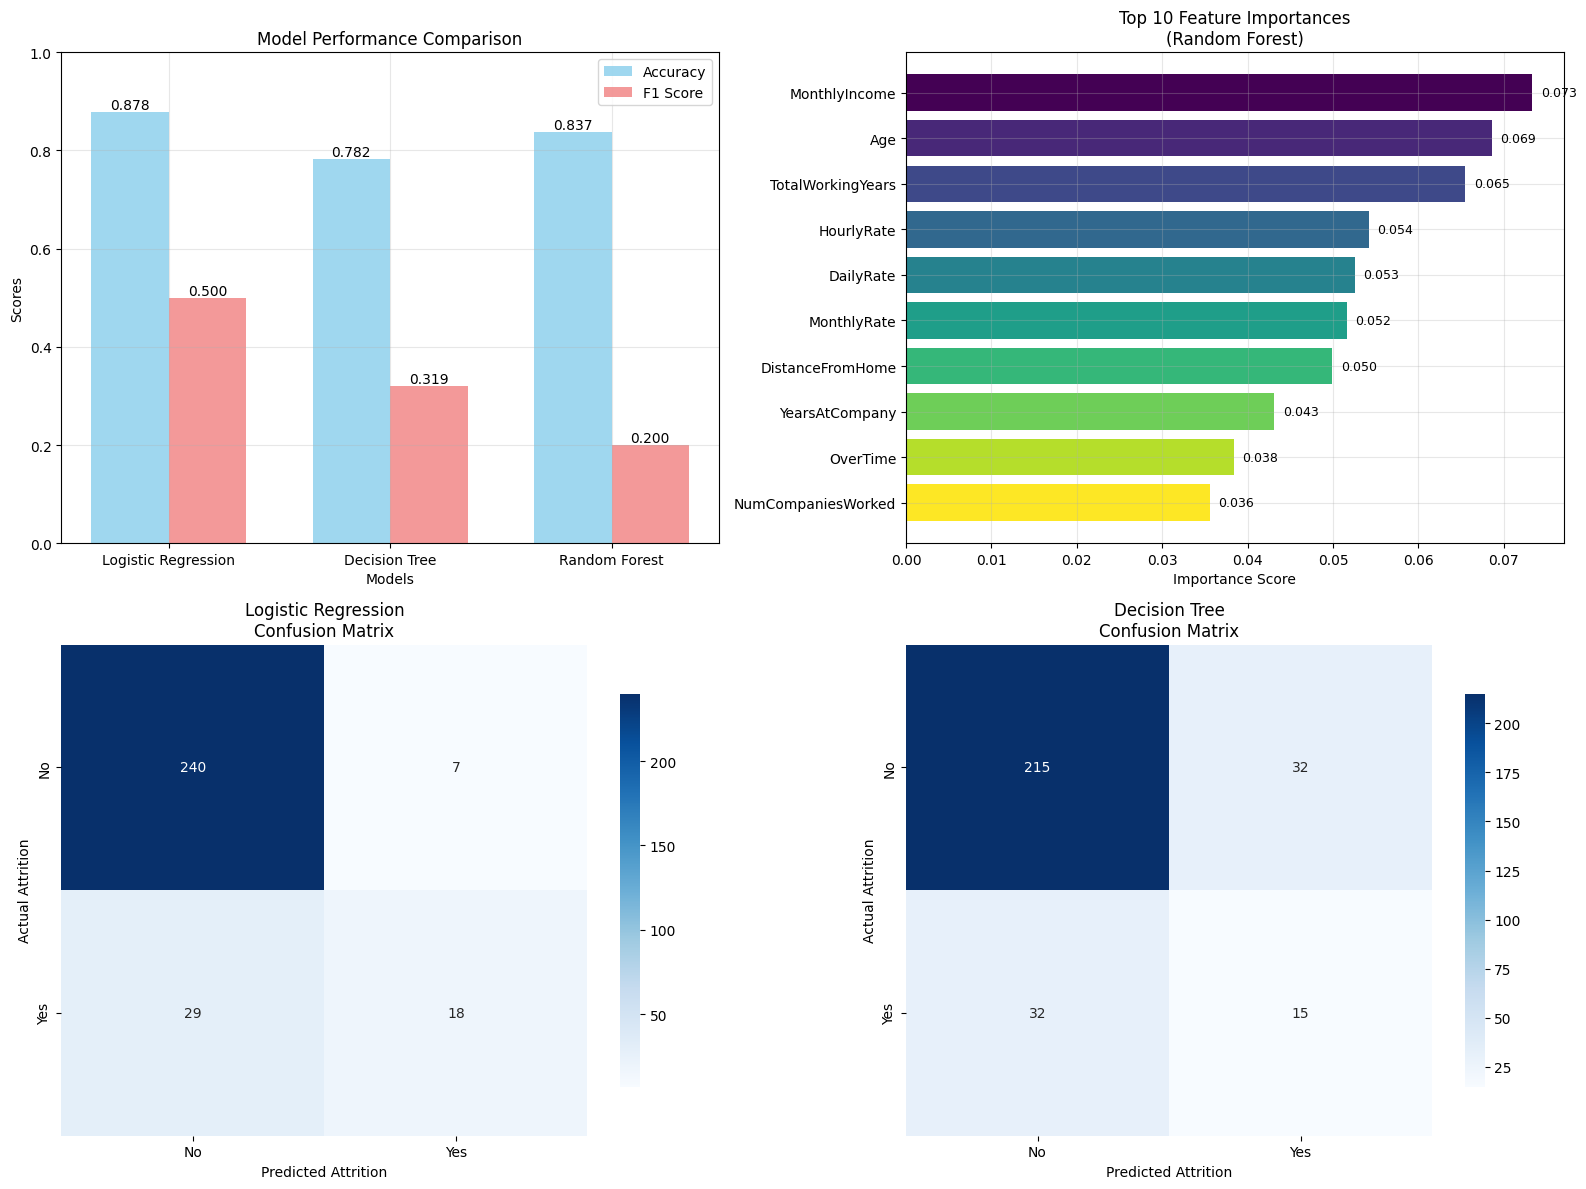

In [28]:
plt.figure(figsize=(16, 12))
# Model ki performane ko compare kerwane ke lie
plt.subplot(2, 2, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
f1_scores = [results[name]['f1_score'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

bars1 = plt.bar(x - width/2, accuracies, width, label='Accuracy',
                alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score',
                alpha=0.8, color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# values add ki hain takke graph show ho sakkre
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')

# Feature Importance
plt.subplot(2, 2, 2)
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'],
         color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances\n(Random Forest)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)

# Confusion Matrices
confusion_positions = [3, 4]  # Positions for 2x2 grid: 1,2,3,4
for i, (name, pos) in enumerate(zip(models.keys(), confusion_positions)):
    plt.subplot(2, 2, pos)
    cm = results[name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar_kws={'shrink': 0.8},
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title(f'{name}\nConfusion Matrix')
    plt.ylabel('Actual Attrition')
    plt.xlabel('Predicted Attrition')

plt.tight_layout()
plt.show()